In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from keras.optimizers import RMSprop

In [2]:
max_features=10000
maxlen=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

#blokowanie sekwencji
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)


In [3]:
model=Sequential()
model.add(layers.Embedding(max_features,128,input_length=maxlen))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

C:\Users\abuka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
157/157 [==============================] - 29s 162ms/step - loss: 0.8735 - acc: 0.4974 - val_loss: 0.6942 - val_acc: 0.5041
Epoch 2/10
157/157 [==============================] - 23s 149ms/step - loss: 0.6943 - acc: 0.5013 - val_loss: 0.7007 - val_acc: 0.4941
Epoch 3/10
157/157 [==============================] - 23s 147ms/step - loss: 0.6943 - acc: 0.5006 - val_loss: 0.6940 - val_acc: 0.5050
Epoch 4/10
157/157 [==============================] - 20s 125ms/step - loss: 0.6941 - acc: 0.5025 - val_loss: 0.6940 - val_acc: 0.5053
Epoch 5/10
157/157 [==============================] - 20s 130ms/step - loss: 0.6943 - acc: 0.4967 - val_loss: 0.6960 - val_acc: 0.4945
Epoch 6/10
157/157 [==============================] - 20s 126ms/step - loss: 0.6940 - acc: 0.5004 - val_loss: 0.6946 - val_acc: 0.4952
Epoch 7/10
157/157 [==============================] - 20s 126ms/step - loss: 0.6938 - acc: 0.5023 - val_loss: 0.6944 - val_acc: 0.4951
Epoch 8/10
157/157 [==============================] - 2

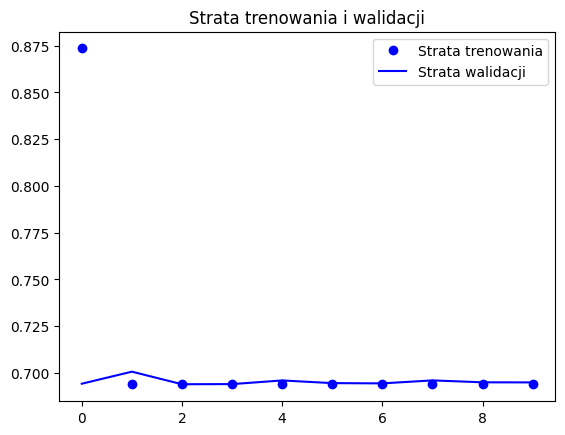

In [4]:
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))

plt.figure()
plt.plot(epochs, loss,'bo',label='Strata trenowania')
plt.plot(epochs, val_loss,'b',label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()
plt.show()